In [228]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime 


In [229]:
#读取数据
dateparser = lambda dates:datetime.strptime(dates,'%Y')
data_csv = pd.read_csv('./TX/Clean_index.csv',parse_dates= ['year'],index_col='year',date_parser=dateparser)
data_csv = data_csv[29:50]
index = pd.date_range(start = data_csv.index.min(),end=data_csv.index.max(),freq='AS')

data_csv.reindex(index)


,data
1989-01-01,-0.646066
1990-01-01,-0.535212
1991-01-01,-0.559775
1992-01-01,-0.708050
1993-01-01,-0.496445
1994-01-01,-0.442424
1995-01-01,-0.508518
1996-01-01,-0.501293
1997-01-01,-0.679699
1998-01-01,-0.565425


In [230]:
data_csv.index

DatetimeIndex(['1989-01-01', '1990-01-01', '1991-01-01', '1992-01-01',
               '1993-01-01', '1994-01-01', '1995-01-01', '1996-01-01',
               '1997-01-01', '1998-01-01', '1999-01-01', '2000-01-01',
               '2001-01-01', '2002-01-01', '2003-01-01', '2004-01-01',
               '2005-01-01', '2006-01-01', '2007-01-01', '2008-01-01',
               '2009-01-01'],
              dtype='datetime64[ns]', name='year', freq=None)

In [231]:
#单位根校验、白噪声校验
from statsmodels.stats.diagnostic import  acorr_ljungbox
acorr_ljungbox(data_csv.data,lags=1) #大于0.05,为非白噪声

(array([5.96578222]), array([0.01458613]))

In [232]:
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import  seasonal_decompose
from statsmodels.tsa.stattools import adfuller as ADF
from datetime import  datetime

def autocorrelation(timeseries,lags):
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(211)
    sm.graphics.tsa.plot_acf(timeseries,lags=lags,ax=ax1)
    ax2 = fig.add_subplot(212)
    sm.graphics.tsa.plot_pacf(timeseries,lags=lags,ax=ax2)
    plt.show()
def diff(timeseries):
    timeseries_diff1 = timeseries.diff(1)
    timeseries_diff2 = timeseries_diff1.diff(1)

    timeseries_diff1 = timeseries_diff1.fillna(0)
    timeseries_diff2 = timeseries_diff2.fillna(0)


    timeseries_adf = ADF(timeseries.tolist())
    timeseries_diff1_adf = ADF(timeseries_diff1.tolist())
    timeseries_diff2_adf = ADF(timeseries_diff2.tolist())

    print('timeseries_adf : ', timeseries_adf)
    print('timeseries_diff1_adf : ', timeseries_diff1_adf)
    print('timeseries_diff2_adf : ', timeseries_diff2_adf)

    plt.figure(figsize=(12, 8))
    plt.plot(timeseries, label='Original', color='blue')
    plt.plot(timeseries_diff1, label='Diff1', color='red')
    plt.plot(timeseries_diff2, label='Diff2', color='purple')
    plt.legend(loc='best')
    plt.show()

timeseries_adf :  (-2.168564282297051, 0.21785194454621748, 0, 20, {'1%': -3.8092091249999998, '5%': -3.0216450000000004, '10%': -2.6507125}, -14.78430211847024)
timeseries_diff1_adf :  (-5.3399680389612465, 4.522849668013161e-06, 8, 12, {'1%': -4.137829282407408, '5%': -3.1549724074074077, '10%': -2.7144769444444443}, -30.4005777369413)
timeseries_diff2_adf :  (-3.040789820618686, 0.03125676879154505, 8, 12, {'1%': -4.137829282407408, '5%': -3.1549724074074077, '10%': -2.7144769444444443}, -20.375238818436557)


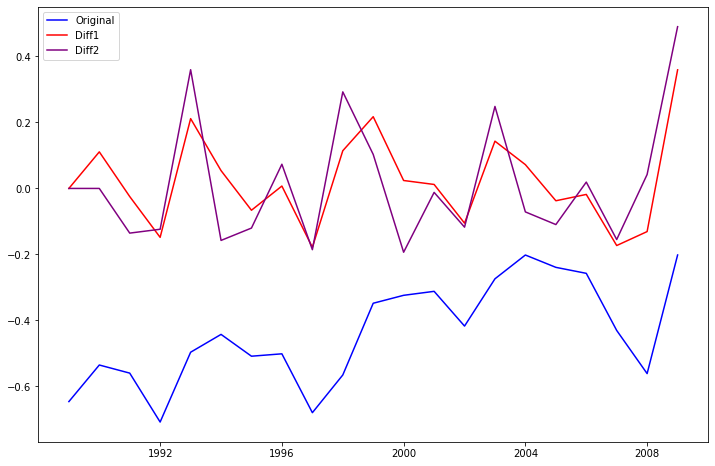

In [233]:
diff(data_csv.data) #一阶差分！

In [234]:
trend_evaluate = sm.tsa.arma_order_select_ic(data_csv.data, ic=['aic', 'bic'], trend='nc', max_ar=5,max_ma=5)
print('data AIC', trend_evaluate.aic_min_order)
print('data BIC', trend_evaluate.bic_min_order)

C:\Users\Owen\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Owen\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Owen\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Owen\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Owen\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Owen\Anaconda3\l

data AIC (5, 0)
data BIC (1, 0)


C:\Users\Owen\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [236]:
data_csv.data

year
1989-01-01   -0.646066
1990-01-01   -0.535212
1991-01-01   -0.559775
1992-01-01   -0.708050
1993-01-01   -0.496445
1994-01-01   -0.442424
1995-01-01   -0.508518
1996-01-01   -0.501293
1997-01-01   -0.679699
1998-01-01   -0.565425
1999-01-01   -0.348012
2000-01-01   -0.323970
2001-01-01   -0.311913
2002-01-01   -0.417199
2003-01-01   -0.273946
2004-01-01   -0.201815
2005-01-01   -0.239187
2006-01-01   -0.257361
2007-01-01   -0.430429
2008-01-01   -0.561215
2009-01-01   -0.201742
Name: data, dtype: float64

In [240]:

def ARIMA_Model(timeseries, order):
    model = ARIMA(timeseries, order=order)
    return model.fit(disp=0)

trend_model = ARIMA_Model(data_csv.data,(1,0,0))
trend_fit_seq = trend_model.fittedvalues
trend_predict_seq = trend_model.predict(start="2009",end="2050",dynamic=True)

C:\Users\Owen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


In [242]:
#trend_predict_seq = predict_diff_recover(trend_predict_seq,)
trend_predict_seq

2009-01-01   -0.509716
2010-01-01   -0.479537
2011-01-01   -0.461851
2012-01-01   -0.451487
2013-01-01   -0.445414
2014-01-01   -0.441854
2015-01-01   -0.439769
2016-01-01   -0.438546
2017-01-01   -0.437830
2018-01-01   -0.437410
2019-01-01   -0.437164
2020-01-01   -0.437020
2021-01-01   -0.436936
2022-01-01   -0.436886
2023-01-01   -0.436857
2024-01-01   -0.436840
2025-01-01   -0.436830
2026-01-01   -0.436824
2027-01-01   -0.436821
2028-01-01   -0.436819
2029-01-01   -0.436818
2030-01-01   -0.436817
2031-01-01   -0.436817
2032-01-01   -0.436816
2033-01-01   -0.436816
2034-01-01   -0.436816
2035-01-01   -0.436816
2036-01-01   -0.436816
2037-01-01   -0.436816
2038-01-01   -0.436816
2039-01-01   -0.436816
2040-01-01   -0.436816
2041-01-01   -0.436816
2042-01-01   -0.436816
2043-01-01   -0.436816
2044-01-01   -0.436816
2045-01-01   -0.436816
2046-01-01   -0.436816
2047-01-01   -0.436816
2048-01-01   -0.436816
2049-01-01   -0.436816
2050-01-01   -0.436816
Freq: AS-JAN, dtype: float64

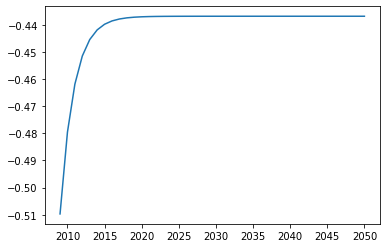

In [243]:
plt.plot(trend_predict_seq)

In [244]:

data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAYIAAAD5CAYAAAAqaDI/AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjMuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8vihELAAAACXBIWXMAAAsTAAALEwEAmpwYAAAZWklEQVR4nO3df4zc9X3n8efLu3iX8MP4x4Jd22BTW5eaNrm0i7k06MSV2BiukakKF3OnO+tKZJ1apMsfUWvKJUQmkSA6XXqnS5VaYNVFpyMnGpKlcetzgCi6uwS8JBBjgmsDTr0xtRfbwSHZ8czOvu+P+czu7Hh2vesZ76z9eT2k1c73O5+Zee8H9vva7+fz/fqjiMDMzPI1p90FmJlZezkIzMwy5yAwM8ucg8DMLHMOAjOzzDkIzMwy19mKN5G0AfivQAfweEQ8Wvd8F/BXwG8BJ4BPRsRhSWuB7dVmwOcj4plzfd6iRYtixYoVrSjdzCwLixYtYvfu3bsjYkP9c00HgaQO4CvAOmAA2CupLyJer2l2P3AqIlZJ2gQ8BnwSeA3ojYhhSUuAVyU9GxHDk33mihUr6O/vb7Z0M7OsSFrUaH8rhobWAoci4q2IKAJPARvr2mwEdqbHTwO3S1JE/LLmoN8N+O42M7MZ1oogWAocqdkeSPsatkkH/veAhQCSbpG0H9gH/IdznQ2YmVlrtSII1GBf/V/2E7aJiBcj4ibgZuBBSd0NP0TaIqlfUv/g4GBTBZuZ2ZhWBMEAsLxmexlwdKI2kjqBecDJ2gYR8WPgF8CvN/qQiNgeEb0R0dvT09OCss3MDFoTBHuB1ZJWSpoLbAL66tr0AZvT43uA5yMi0ms6ASTdAPwT4HALajIzsylq+qqhdMXPA8BuKpeP7oiI/ZK2Af0R0Qc8ATwp6RCVM4FN6eW3AlsllYAR4A8j4t1mazIzs6nTxfjPUPf29oYvHzUzmx5JL0dEb/1+31mclEeCp176B4rDI+0uxcxsRjkIkleOnGLr1/exa9877S7FzGxGOQiS98+UAXjp8MlztDQzu7Q4CJKhYgqCtx0EZpYXB0FSKFWC4NDx93n3/TNtrsbMbOY4CJKhFAQA/R4eMrOMOAiS6tDQHMFLb59qczVmZjPHQZAUhitB8E+XX8NLh0+0uRozs5njIEgKxTIS3Lq6h9ePnuZ0odTukszMZoSDIBkqlbn8sg5uWbmAkYCXf+LhITPLg4MgqQbBR66/hs45Yq8vIzWzTDgIkqHiCN2XdfCBuZ38xrJ5vp/AzLLhIEgKpTKXz+0AYO3KBbw68LPRewvMzC5lDoKkOjQEcMvKBZTKwQ//4WftLcrMbAY4CJJCqUz3ZZXu+K0bFiD5n5swszw4CJKhUpnudEYw7/LL+ODiq9nrO4zNLAMOgmSoODY0BJXhoZd/copS2esTmNmlzUGQ1E4WQ2XCeKhU5rWfvtfGqszMLjwHQVI7WQxw84oFgOcJzOzS5yBIhopjcwQAPVd1ceOiKxwEZnbJcxAkheGRcUEAleGhvYdPMjISbarKzOzCcxBQWbi+ODwybmgIKkFwujDMgWM/b1NlZmYXnoOAsdXJLp87vjvWrvQ8gZld+loSBJI2SDog6ZCkrQ2e75L0tfT8i5JWpP3rJL0saV/6/jutqGe6qquT1Z8RLJv/AX5lXreDwMwuaU0HgaQO4CvAncAa4D5Ja+qa3Q+ciohVwJeBx9L+d4FPRMRvAJuBJ5ut53xUVyernyOAylnBS4dPEuF5AjO7NLXijGAtcCgi3oqIIvAUsLGuzUZgZ3r8NHC7JEXEDyPiaNq/H+iW1NWCmqZlbGioURAsZPDnZzh84pczXZaZ2YxoRRAsBY7UbA+kfQ3bRMQw8B6wsK7N7wM/jIgzjT5E0hZJ/ZL6BwcHW1D2mOrQUHdn4zMCgJfennz5Sp8xmNnFqrMF76EG++qPipO2kXQTleGi9RN9SERsB7YD9Pb2tvSoWyhV/hmJRmcEv9pzBQuvmMuLb5/kkzdf36gunv3RO2x79nUKpTLXXd3F4nndXHd1N4uvrny/7upuFl45lwgYLo8wPBKURyJ9H6FUjtHOECBVH1ceqFHvmVmW7rhpMR1zWntQaEUQDADLa7aXAUcnaDMgqROYB5wEkLQMeAb4dxHxZgvqmbbRM4IGcwSSuHnFgoYTxsdPF3joG6+x5/VjfHj5NXxk+TUcO13gH08X+P6bJzj+8zMM+x4EM2uhNx7ZQMecs49VzWhFEOwFVktaCfwU2AT867o2fVQmg78H3AM8HxEh6RrgW8CDEfF/W1DLealOFtdfNVS1duUC/m7/P3L0Z0P8yjWXExH89Q9+yrZn93NmeIQ/veuD3H/rjWel9MhIcOIXRY6dLnDiF0U6JDo7ROcc0TFHXNYxh445lW1JVE+SIsZOlyqPY/TswMzyNrej9Vf9Nx0EETEs6QFgN9AB7IiI/ZK2Af0R0Qc8ATwp6RCVM4FN6eUPAKuAz0r6bNq3PiKON1vXdEw2WQxj8wR7D59k7coF/OnX9/HCgUF6b5jPl+75EDf2XNnwdXPmiJ6ruui5asbnv83MpqwVZwRExC5gV92+z9U8LgD3NnjdF4AvtKKGZkx0H0HVry25mqu6Otn+3bf4T8+8xvBI8PAn1rD5oyuY0+KxOjOzmdaSILjYnWtoqGOO6F0xnxcODPLPblzAY7//IW5YeMVMlmhmdsE4CBg7I+i6bOKxt4f+5a9xb+9yNty02GcBZnZJcRAAZ0plJOjqnDgIVl17FauuvWoGqzIzmxn+R+cYW5RGvmDfzDLkIODs1cnMzHLiIACGimcvSmNmlgsHAWcvXG9mlhMHAZWhoe5JrhgyM7uU+ehHOiPw0JCZZcpBQPWMwEFgZnlyEFC5s9hnBGaWKwcBniw2s7w5CPB9BGaWNwcBlaEhzxGYWa4cBFSWqnQQmFmusg+C8khQLI94aMjMspV9EIytTpZ9V5hZprI/+p1rdTIzs0udgyCtTuY5AjPLVfZBcK6F683MLnXZB0F1aKi700FgZnnKPggKpRHAZwRmlq+WBIGkDZIOSDokaWuD57skfS09/6KkFWn/QkkvSHpf0n9vRS3TNXpG4DkCM8tU00EgqQP4CnAnsAa4T9Kaumb3A6ciYhXwZeCxtL8AfBb4TLN1nK/qZLGvGjKzXLXijGAtcCgi3oqIIvAUsLGuzUZgZ3r8NHC7JEXELyLi/1AJhLbwZLGZ5a4VQbAUOFKzPZD2NWwTEcPAe8DC6XyIpC2S+iX1Dw4ONlHueL6PwMxy14ogUIN9cR5tJhUR2yOiNyJ6e3p6pvPSSXloyMxy14ogGACW12wvA45O1EZSJzAPONmCz25a9Yygy2sWm1mmWnH02wuslrRS0lxgE9BX16YP2Jwe3wM8HxHTOiO4UM6UykjQ1ekgMLM8dTb7BhExLOkBYDfQAeyIiP2StgH9EdEHPAE8KekQlTOBTdXXSzoMXA3MlXQ3sD4iXm+2rqmqLkojNRq9MjO79DUdBAARsQvYVbfvczWPC8C9E7x2RStqOF9enczMcpf9eMhQ0YvSmFnesg8CL1xvZrnLPgiGSmW6fcWQmWUs+yNgwXMEZpa57IOgckbgIDCzfDkIij4jMLO8ZR8Eniw2s9xlHwS+j8DMcucgKHqOwMzyln0QFEq+oczM8pZ1EJRHgmJ5xENDZpa1rINgbHWyrLvBzDKX9RHQq5OZmeUeBGl1Ms8RmFnOsg4CL1xvZpZ5EFSHhro7HQRmlq+8g6DoMwIzs6yDoDA8AniOwMzylnUQjJ4ROAjMLGNZB4Eni83MMg8C30dgZpZ7EIzeR5B1N5hZ5rI+Ao5ePuozAjPLWEuCQNIGSQckHZK0tcHzXZK+lp5/UdKKmuceTPsPSLqjFfVM1ZlSGQm6OrPOQzPLXNNHQEkdwFeAO4E1wH2S1tQ1ux84FRGrgC8Dj6XXrgE2ATcBG4A/T+83I6qL0kiaqY80M5t1WvGn8FrgUES8FRFF4ClgY12bjcDO9Php4HZVjr4bgaci4kxEvA0cSu83I7w6mZlZa4JgKXCkZnsg7WvYJiKGgfeAhVN8LQCStkjql9Q/ODjYgrJhqOhFaczMWhEEjcZVYoptpvLays6I7RHRGxG9PT090yyxMS9cb2bWmiAYAJbXbC8Djk7URlInMA84OcXXXjBDpbIvHTWz7LXiKLgXWC1ppaS5VCZ/++ra9AGb0+N7gOcjItL+TemqopXAauClFtQ0JUNFzxGYmXU2+wYRMSzpAWA30AHsiIj9krYB/RHRBzwBPCnpEJUzgU3ptfsl/S/gdWAY+KOIKDdb01QVhstc2dV0F5iZXdRachSMiF3Arrp9n6t5XADuneC1XwS+2Io6pmuoWKbnyq52fLSZ2ayR9QC5J4vNzDIPAt9HYGaWexAUy76PwMyyl3UQFEq+oczMLNsgKI8ExfKIh4bMLHvZBsHY6mTZdoGZGZBxEHh1MjOzinyDoOhFaczMIOMgKHh1MjMzIOMg8NCQmVlFvkFQrE4WOwjMLG/ZBkFheATw0JCZWbZBMHpG4CAws8xlGwRj9xE4CMwsb9kGgSeLzcwq8g2C0fsIsu0CMzMg5yDwfQRmZkDGQXCmVEaCrs5su8DMDMg4CKqL0khqdylmZm2VfRCYmeUu3yAoelEaMzPIOAgKpbKvGDIzo8kgkLRA0h5JB9P3+RO025zaHJS0uWb/FyUdkfR+M3Wcj6FS2TeTmZnR/BnBVuC5iFgNPJe2x5G0AHgYuAVYCzxcExjPpn0zbqjoOQIzM2g+CDYCO9PjncDdDdrcAeyJiJMRcQrYA2wAiIjvR8Q7TdZwXgrDZc8RmJnRfBBcVz2Qp+/XNmizFDhSsz2Q9k2LpC2S+iX1Dw4OnlextXxGYGZW0XmuBpK+DSxu8NRDU/yMRhfqxxRfO/aCiO3AdoDe3t5pv75ewXMEZmbAFIIgIj4+0XOSjklaEhHvSFoCHG/QbAC4rWZ7GfCdadbZcr6PwMysotmhoT6gehXQZuCbDdrsBtZLmp8midenfW01VPQcgZkZNB8EjwLrJB0E1qVtJPVKehwgIk4CjwB709e2tA9JX5I0AHxA0oCkzzdZz5QVSr6hzMwMpjA0NJmIOAHc3mB/P/Cpmu0dwI4G7f4Y+ONmajgf5ZGgWB7x0JCZGZneWTy2OlmWP76Z2ThZHgm9OpmZ2Zg8g6DoRWnMzKqyDIKCVyczMxuVZRB4aMjMbEyeQVCsThY7CMzMsgyCwvAI4KEhMzPINAhGzwgcBGZmeQbB2H0EDgIzsyyDYGj0qqEsf3wzs3GyPBJ6aMjMbEyeQeD7CMzMRmUZBIVSGQm6OrP88c3MxsnySFhIi9JIjRZPMzPLS5ZB4NXJzMzG5BkERS9KY2ZWlWUQFEplXzpqZpZkeTQcKpV9M5mZWZJnEBQ9R2BmVpVlEBSGy54jMDNLsgwCnxGYmY3JMggKniMwMxvVVBBIWiBpj6SD6fv8CdptTm0OStqc9n1A0rckvSFpv6RHm6llOoZKZbo7HQRmZtD8GcFW4LmIWA08l7bHkbQAeBi4BVgLPFwTGP85Ij4IfAT4mKQ7m6xnSoaKPiMwM6tqNgg2AjvT453A3Q3a3AHsiYiTEXEK2ANsiIhfRsQLABFRBH4ALGuynikplHxDmZlZVbNBcF1EvAOQvl/boM1S4EjN9kDaN0rSNcAnqJxVXFDlkaBYHvFksZlZ0nmuBpK+DSxu8NRDU/yMRv+yW9S8fyfwP4H/FhFvTVLHFmALwPXXXz/Fjz7b2OpkWc6Tm5md5ZxBEBEfn+g5ScckLYmIdyQtAY43aDYA3FazvQz4Ts32duBgRPzZOerYntrS29sbk7WdTHUtAp8RmJlVNPtncR+wOT3eDHyzQZvdwHpJ89Mk8fq0D0lfAOYBn26yjimrrk7mOQIzs4pmg+BRYJ2kg8C6tI2kXkmPA0TESeARYG/62hYRJyUtozK8tAb4gaRXJH2qyXrOqeDVyczMxjnn0NBkIuIEcHuD/f3Ap2q2dwA76toM0Hj+4ILy0JCZ2XjZzZiOLlzv+wjMzIAMg6AwPAJ4aMjMrCq7IBg9I3AQmJkBGQbB2H0EDgIzM8gwCIZGrxrK7kc3M2sou6Ohh4bMzMbLLwh8H4GZ2TjZBUGhVEaCrs7sfnQzs4ayOxoWSpVlKqUZv5fNzGxWyi4Ihkper9jMrFZ+QVD0ojRmZrWyC4JCqexLR83MamR3RBwqeb1iM7Na+QVB0XMEZma1sguCwnDZcwRmZjWyCwKfEZiZjZddEBQ8R2BmNk52QTBUKtPd6SAwM6vKLwiKPiMwM6uVXRAUSr6hzMysVlZBUB4JiuURTxabmdXIKgjGVifL6sc2M5tUVkfE6loEPiMwMxvTVBBIWiBpj6SD6fv8CdptTm0OStpcs//vJL0qab+kr0q6oEfo6upkXQ4CM7NRzZ4RbAWei4jVwHNpexxJC4CHgVuAtcDDNYHxryLiw8CvAz3AvU3WM6mCzwjMzM7SbBBsBHamxzuBuxu0uQPYExEnI+IUsAfYABARp1ObTmAuEE3WMykPDZmZna3ZILguIt4BSN+vbdBmKXCkZnsg7QNA0m7gOPBz4OmJPkjSFkn9kvoHBwfPq9jRhet9H4GZ2ahzBoGkb0t6rcHXxil+RqM1IUf/8o+IO4AlQBfwOxO9SURsj4jeiOjt6emZ4keP54XrzczO1nmuBhHx8Ymek3RM0pKIeEfSEip/2dcbAG6r2V4GfKfuMwqS+qgMNe2ZQt3npVAaATw0ZGZWq9mhoT6gehXQZuCbDdrsBtZLmp8midcDuyVdmcIDSZ3AXcAbTdYzqbH7CBwEZmZVzQbBo8A6SQeBdWkbSb2SHgeIiJPAI8De9LUt7bsC6JP0I+BVKmcTX22ynkmNDQ1ldfuEmdmkzjk0NJmIOAHc3mB/P/Cpmu0dwI66NseAm5v5/OkanSz20JCZ2ais/jT2ZLGZ2dmyCoJCqYwEXZ1Z/dhmZpPK6ohYKFWWqZQaXdFqZpanrIJgqOT1is3M6uUVBEUvSmNmVi+rICiUyr501MysTlZHxaGS1ys2M6uXVxAUPUdgZlYvryAolT1HYGZWJ6sgKPiqITOzszT1T0xcbD62ahFL5nW3uwwzs1klqyD47O+uaXcJZmazTlZDQ2ZmdjYHgZlZ5hwEZmaZcxCYmWXOQWBmljkHgZlZ5hwEZmaZcxCYmWVOEdHuGqZN0iDwk/N8+SLg3RaW0yqua3pc1/S4rum5FOt6FyAiNtQ/cVEGQTMk9UdEb7vrqOe6psd1TY/rmp7c6vLQkJlZ5hwEZmaZyzEItre7gAm4rulxXdPjuqYnq7qymyMwM7PxcjwjMDOzGhd9EEhaLukFST+WtF/Sf0z7F0jaI+lg+j4/7f+gpO9JOiPpM3XvtUHSAUmHJG2dRXUdlrRP0iuS+me4rn8j6Ufp6/9J+nDNe7Wzvyarq539tTHV9Iqkfkm31rzX5tT+oKTNs6iuctr/iqS+mayr5nU3pzruqdnXtv46R11t6y9Jt0l6r+bzP1fzXuf/+xgRF/UXsAT4zfT4KuDvgTXAl4Ctaf9W4LH0+FrgZuCLwGdq3qcDeBO4EZgLvAqsaXdd6bnDwKI29ddvA/PT4zuBF2dJfzWsaxb015WMDbl+CHgjPV4AvJW+z0+P57e7rrT9frt+H2v+X3oe2AXcMxv6a6K62t1fwG3A3zR4n6Z+H1vyw8ymL+CbwDrgALCkprMP1LX7POOD4KPA7prtB4EH211X2neYFh3YzreutH8+8NPZ1F/1dc2y/voo8OP0+D7gL2qe+wvgvnbXlbZbdmA7n7qATwN/BPwlY0HQ9v5qVFe7+4uJg6Cp38eLfmiolqQVwEeAF4HrIuIdgPT92nO8fClwpGZ7IO1rd10AAfxvSS9L2tKKms6zrvuBv02PZ1N/1dYFbe4vSb8n6Q3gW8AfpN1t768J6gLoTsNF35d0dytqmmpdkpYCvwd8te7lbe2vSeqCNvZX8lFJr0r6W0k3pX1N9dcls2axpCuBvwY+HRGnJU37LRrsa/qSqhbUBfCxiDgq6Vpgj6Q3IuK7M1mXpH9B5YBbHVueFf3VoC5oc39FxDPAM5L+OfAI8HFmQX9NUBfA9am/bgSel7QvIt6cobr+DPiTiCjXtWl3f01UF7S3v34A3BAR70u6C/gGsJom++uSOCOQdBmVTvwfEfH1tPuYpCXp+SXA8XO8zQCwvGZ7GXB0FtRFRBxN348DzwBrZ7IuSR8CHgc2RsSJtLvt/TVBXW3vr5o6vgv8qqRFzIL+mqCu2v56C/gOlb9KZ6quXuApSYeBe4A/T39lt7u/Jqqrrf0VEacj4v30eBdwWSv+/7rog0CV6HyCypjnf6l5qg+oXmmwmcrY22T2AqslrZQ0F9iU3qOtdUm6QtJV1cfAeuC1mapL0vXA14F/GxF/X9O+rf01UV2zoL9Wpdcg6TepTNydAHYD6yXNV+UKkPVpX1vrSvV0pf2LgI8Br89UXRGxMiJWRMQK4GngDyPiG7S5vyaqq939JWlxzX/HtVSO4Sdo9vfxQk16zNQXlSGBAH4EvJK+7gIWAs8BB9P3Ban9YirpeRr4WXp8dXruLiqz9m8CD82GuqhcBfBq+trfhroeB07VtO2vea929lfDumZBf/1J+txXgO8Bt9a81x8Ah9LXv58NdVG5+mpf6q99wP0zWVfda/+S8ZOybeuviepqd38BD6T/jq8C3wd+uxW/j76z2Mwscxf90JCZmTXHQWBmljkHgZlZ5hwEZmaZcxCYmWXOQWBmljkHgZlZ5hwEZmaZ+//UqczmJjiC/AAAAABJRU5ErkJggg==

def decomposing(timeseries):
    decomposition = seasonal_decompose(timeseries)
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

    plt.figure(figsize=(16, 12))
    plt.subplot(411)
    plt.plot(timeseries, label='Original')
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(trend, label='Trend')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(seasonal, label='Seasonarity')
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(residual, label='Residual')
    plt.legend(loc='best')
    plt.show()
    


SyntaxError: invalid syntax (<ipython-input-244-99a1e3a8ac1b>, line 1)

In [245]:
trend_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: ARMA
====================================================================
Model:              ARMA             BIC:                 -17.4734  
Dependent Variable: data             Log-Likelihood:      13.303    
Date:               2021-01-28 18:36 Scale:               1.0000    
No. Observations:   21               Method:              css-mle   
Df Model:           2                Sample:              01-01-1989
Df Residuals:       19                                    01-01-2009
Converged:          1.0000           S.D. of innovations: 0.127     
No. Iterations:     9.0000           HQIC:                -19.927   
AIC:                -20.6070                                        
----------------------------------------------------------------------
              Coef.    Std.Err.      t      P>|t|     [0.025    0.975]
----------------------------------------------------------------------
const        -0.4368     0.0629   -6.9420   0.0000   -0.5601   -0.3135
ar.L1.data    0.5860     0.1915    3.0605   0.0064    0.2107    0.9613
-----------------------------------------------------------------------------
                 Real           Imaginary          Modulus          Frequency
-----------------------------------------------------------------------------
AR.1            1.7064             0.0000           1.7064             0.0000
====================================================================

"""

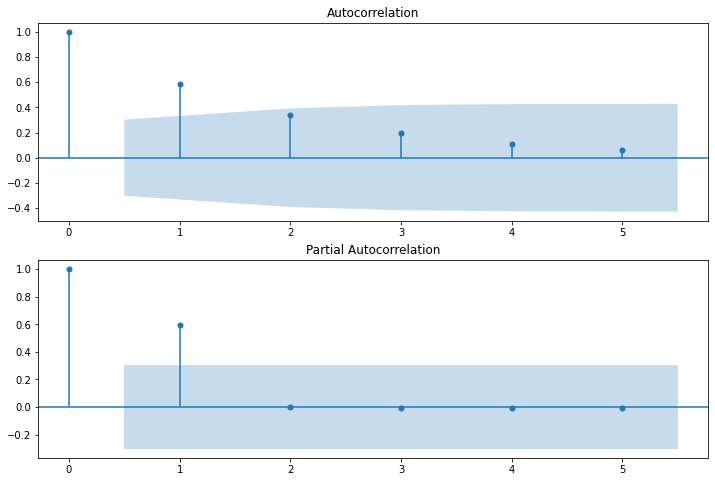

In [246]:
autocorrelation(trend_predict_seq,lags=5)